# Building a Credit Risk Model:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [4]:
# Loading data
test_data_backup = pd.read_csv(r"C:\Users\obien\Desktop\Jobs and Interviews\Fiverr\matthiaslanyiat-attach\matthiaslanyiat-attachments Datasets\Test_Dataset.csv", delimiter=';')
train_data_backup = pd.read_csv(r"C:\Users\obien\Desktop\Jobs and Interviews\Fiverr\matthiaslanyiat-attach\matthiaslanyiat-attachments Datasets\Training_Dataset.csv", delimiter=';')

In [5]:
test_data = test_data_backup.copy()
train_data = train_data_backup.copy()

In [6]:
train_data

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_374,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,37831990.81,17111465.66,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_790,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4669178.63,927837.74,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_654,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8238473.86,7519183.22,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
3,C_057,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,35465651.58,8545183.94,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
4,C_103,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,84847.70,80615.11,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,C_105,0,GmbH,85716,70210,2000,64.0,GKV,5.175343e+06,5.241814e+06,...,NaN,4.735249e+05,1106105.07,797040.22,252537.31,NaN,NaN,-4.333359e+05,-4.270350e+04,77968.25
665,C_378,0,GmbH,85521,46693,2000,NaN,GKV,4.307021e+07,4.307021e+07,...,NaN,-1.120000e-08,6307456.86,7263643.45,573037.66,NaN,NaN,1.407505e+06,-4.940000e+05,-1400459.36
666,C_240,0,GmbH & Co. KG,82031,68100,2000,NaN,GKV,5.089641e+06,5.033756e+06,...,NaN,6.532284e+06,5290889.77,3203739.67,903999.86,140311.63,NaN,8.024164e+05,-5.104500e+04,-156253.86
667,C_045,0,GmbH,85716,79110,2011,NaN,GKV,2.614807e+07,2.580716e+07,...,NaN,3.508818e+06,16006662.71,10149750.24,3653350.01,4400972.00,197800.0,1.114405e+05,-7.893092e+05,-544300.00


In [7]:
#train_data['legal_form'].unique()

In [8]:
train_data.columns.values

array(['id', 'default', 'legal_form', 'zip_code', 'sector', 'year_inc',
       'count_emp', 'type_pl', 'sales', 'gross_performance',
       'gross_profit', 'earn_from_op', 'fin_result', 'oth_interest_inc',
       'oth_interest_exp', 'result_from_ord_bus', 'total_result',
       'annual_profit', 'total_assets', 'total_liabilities_st',
       'total_liabilities_mt', 'total_liabilities_lt',
       'bank_liabilities_st', 'bank_liabilities_mt',
       'bank_liabilities_lt', 'trade_payables_st', 'trade_payables_mt',
       'trade_payables_lt', 'bonds_payables_st', 'bonds_payables_mt',
       'bonds_payables_lt', 'total_equity', 'current_assets',
       'monetary_current_assets', 'cash', 'trade_receivables_st',
       'trade_receivables_lt', 'cf_operating', 'cf_investment',
       'cf_financing'], dtype=object)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       669 non-null    object 
 1   default                  669 non-null    int64  
 2   legal_form               669 non-null    object 
 3   zip_code                 669 non-null    int64  
 4   sector                   669 non-null    int64  
 5   year_inc                 669 non-null    int64  
 6   count_emp                310 non-null    float64
 7   type_pl                  669 non-null    object 
 8   sales                    669 non-null    float64
 9   gross_performance        663 non-null    float64
 10  gross_profit             663 non-null    float64
 11  earn_from_op             669 non-null    float64
 12  fin_result               648 non-null    float64
 13  oth_interest_inc         540 non-null    float64
 14  oth_interest_exp         6

In [10]:
train_data.describe()

,default,zip_code,sector,year_inc,count_emp,sales,gross_performance,gross_profit,earn_from_op,fin_result,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
count,669.000000,669.000000,669.000000,669.000000,310.000000,6.690000e+02,6.630000e+02,6.630000e+02,6.690000e+02,6.480000e+02,...,0.0,6.520000e+02,6.690000e+02,6.690000e+02,6.380000e+02,3.080000e+02,2.100000e+01,6.670000e+02,6.670000e+02,6.670000e+02
mean,0.062780,49530.835575,50519.246637,1981.545590,334.148387,9.285914e+07,9.009543e+07,1.728980e+07,3.190639e+06,1.085369e+06,...,NaN,1.942224e+07,2.525170e+07,1.731321e+07,1.958259e+06,1.235213e+07,2.973512e+06,5.842986e+06,-3.307812e+06,-2.726324e+06
std,0.242749,27866.850059,21434.495416,113.462146,1203.999424,1.388006e+09,1.391661e+09,6.888936e+07,3.924981e+07,3.395771e+07,...,NaN,1.373130e+08,1.693716e+08,1.505846e+08,6.918007e+06,1.057261e+08,1.317659e+07,6.771017e+07,3.203876e+07,6.986244e+07
min,0.000000,1139.000000,1110.000000,0.000000,1.000000,4.856800e+02,4.856800e+02,-8.197000e+06,-1.340470e+08,-2.087933e+08,...,NaN,-1.120000e-08,2.733000e+02,0.000000e+00,3.090000e+00,2.461000e+01,2.724600e+02,-1.598027e+08,-7.339750e+08,-1.775700e+09
25%,0.000000,27389.000000,36001.000000,1985.000000,40.250000,9.351119e+05,9.278005e+05,6.109478e+05,2.379380e+04,-1.418176e+05,...,NaN,9.047324e+04,2.925975e+05,1.754116e+05,2.019078e+04,9.187993e+04,4.207600e+03,4.319165e+03,-5.348459e+05,-3.093399e+05
50%,0.000000,49084.000000,46730.000000,1996.000000,105.000000,4.143262e+06,4.221475e+06,1.900149e+06,1.466108e+05,-1.473752e+04,...,NaN,6.431062e+05,1.526096e+06,7.326044e+05,1.353199e+05,4.664142e+05,2.658624e+04,1.610686e+05,-6.214998e+04,-1.066428e+04
75%,0.000000,72221.000000,68300.000000,2003.000000,267.750000,2.614807e+07,2.598185e+07,1.076529e+07,8.790000e+05,-3.297225e+02,...,NaN,4.690536e+06,9.631447e+06,4.581944e+06,9.700840e+05,3.056715e+06,1.930000e+05,1.257805e+06,-3.872380e+03,2.973491e+04
max,1.000000,99976.000000,96090.000000,2011.000000,17661.000000,3.577930e+10,3.577930e+10,1.108200e+09,9.684000e+08,8.108910e+08,...,NaN,2.883814e+09,3.122629e+09,3.103777e+09,8.446800e+07,1.692146e+09,6.047698e+07,1.601200e+09,1.378791e+08,1.239602e+08


# Preprocessing of Datasets based on the above results

In [11]:
train_data.isnull()

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
665,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,True,False,False,False
666,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
667,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [12]:
train_data['type_pl'].unique()

array(['GKV', 'UKV'], dtype=object)

In [13]:
train_data.isnull().sum() # checking the amount of missing values in the train dataset

id                           0
default                      0
legal_form                   0
zip_code                     0
sector                       0
year_inc                     0
count_emp                  359
type_pl                      0
sales                        0
gross_performance            6
gross_profit                 6
earn_from_op                 0
fin_result                  21
oth_interest_inc           129
oth_interest_exp            55
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_assets                 0
total_liabilities_st         0
total_liabilities_mt         0
total_liabilities_lt         0
bank_liabilities_st        358
bank_liabilities_mt        481
bank_liabilities_lt        539
trade_payables_st          143
trade_payables_mt          646
trade_payables_lt          665
bonds_payables_st          669
bonds_payables_mt          665
bonds_payables_lt          669
total_equity                17
current_

In [14]:
# Variables with more than 70% missing values shall be dropped because they may lead to inaccuracies
#missing_values=train_data.isnull().sum()
#missing_values[missing_values>0.7]

In [15]:
# Dropping variables with too high missing values and identifier features
columns_to_drop = ['zip_code','count_emp', 'legal_form', 'type_pl', 'bank_liabilities_st', 'bank_liabilities_mt', 'bank_liabilities_lt', 'trade_payables_mt', 'trade_payables_lt', 'bonds_payables_st', 'bonds_payables_mt', 'bonds_payables_lt', 'trade_receivables_st', 'trade_receivables_lt']

In [16]:
train_data.drop(columns=columns_to_drop, inplace=True, axis=1)

In [17]:
train_data.head()

,id,default,sector,year_inc,sales,gross_performance,gross_profit,earn_from_op,fin_result,oth_interest_inc,...,total_liabilities_mt,total_liabilities_lt,trade_payables_st,total_equity,current_assets,monetary_current_assets,cash,cf_operating,cf_investment,cf_financing
0,C_374,0,46730,1900,1.068738e+08,1.068738e+08,3.859361e+07,6536077.55,1345910.44,47945.82,...,3.752194e+06,255645.94,4120064.34,3.224471e+07,37831990.81,17111465.66,10297047.50,6.986094e+06,-1.112342e+06,-7520392.09
1,C_790,0,70101,1976,1.393869e+06,1.407889e+06,1.539841e+06,38140.91,1072009.59,9934.29,...,0.000000e+00,0.00,NaN,4.508026e+06,4669178.63,927837.74,926383.75,-4.343980e+06,1.174427e+06,1128108.08
2,C_654,0,68320,1972,4.384786e+06,4.405058e+06,3.293227e+07,584315.02,22350.95,24560.96,...,8.160722e+04,131901.90,480218.47,1.182011e+07,8238473.86,7519183.22,6890565.23,1.715799e+06,-6.561222e+05,-169655.66
3,C_057,0,47730,1908,1.104478e+08,1.104478e+08,1.254550e+08,54033808.08,-10293209.88,62152.95,...,1.647352e+08,92222172.00,13968005.91,4.547445e+08,35465651.58,8545183.94,5036615.09,1.301809e+08,-1.419776e+08,12567030.80
4,C_103,0,68201,1990,4.518042e+04,4.518042e+04,4.847705e+04,22382.91,147.65,NaN,...,0.000000e+00,0.00,NaN,7.953387e+04,84847.70,80615.11,75679.79,1.800497e+04,-3.787100e+02,0.00


In [18]:
# check the columns with missing values again
train_data.isnull().sum()

id                           0
default                      0
sector                       0
year_inc                     0
sales                        0
gross_performance            6
gross_profit                 6
earn_from_op                 0
fin_result                  21
oth_interest_inc           129
oth_interest_exp            55
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_assets                 0
total_liabilities_st         0
total_liabilities_mt         0
total_liabilities_lt         0
trade_payables_st          143
total_equity                17
current_assets               0
monetary_current_assets      0
cash                        31
cf_operating                 2
cf_investment                2
cf_financing                 2
dtype: int64

In [19]:
# Imputing missing values, Using the median
train_data['fin_result'].fillna(train_data['fin_result'].median(), inplace = True)
train_data['oth_interest_inc'].fillna(train_data['oth_interest_inc'].median(), inplace = True)
train_data['oth_interest_exp'].fillna(train_data['oth_interest_exp'].median(), inplace = True)
train_data['trade_payables_st'].fillna(train_data['trade_payables_st'].median(), inplace = True)
train_data['total_equity'].fillna(train_data['total_equity'].median(), inplace = True)
train_data['cash'].fillna(train_data['cash'].median(), inplace = True)
train_data['cf_operating'].fillna(train_data['cf_operating'].median(), inplace = True)
train_data['cf_investment'].fillna(train_data['cf_investment'].median(), inplace = True)
train_data['cf_financing'].fillna(train_data['cf_financing'].median(), inplace = True)
train_data['gross_performance'].fillna(train_data['gross_performance'].median(), inplace = True)
train_data['gross_profit'].fillna(train_data['gross_profit'].median(), inplace = True)

In [20]:
# Verify missing values imputation success
train_data.isnull().sum()

id                         0
default                    0
sector                     0
year_inc                   0
sales                      0
gross_performance          0
gross_profit               0
earn_from_op               0
fin_result                 0
oth_interest_inc           0
oth_interest_exp           0
result_from_ord_bus        0
total_result               0
annual_profit              0
total_assets               0
total_liabilities_st       0
total_liabilities_mt       0
total_liabilities_lt       0
trade_payables_st          0
total_equity               0
current_assets             0
monetary_current_assets    0
cash                       0
cf_operating               0
cf_investment              0
cf_financing               0
dtype: int64

In [21]:
# Constructing the correlation matrix to check for multicollinearity
correlation_matrix = train_data.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'default'),
  Text(0, 1.5, 'sector'),
  Text(0, 2.5, 'year_inc'),
  Text(0, 3.5, 'sales'),
  Text(0, 4.5, 'gross_performance'),
  Text(0, 5.5, 'gross_profit'),
  Text(0, 6.5, 'earn_from_op'),
  Text(0, 7.5, 'fin_result'),
  Text(0, 8.5, 'oth_interest_inc'),
  Text(0, 9.5, 'oth_interest_exp'),
  Text(0, 10.5, 'result_from_ord_bus'),
  Text(0, 11.5, 'total_result'),
  Text(0, 12.5, 'annual_profit'),
  Text(0, 13.5, 'total_assets'),
  Text(0, 14.5, 'total_liabilities_st'),
  Text(0, 15.5, 'total_liabilities_mt'),
  Text(0, 16.5, 'total_liabilities_lt'),
  Text(0, 17.5, 'trade_payables_st'),
  Text(0, 18.5, 'total_equity'),
  Text(0, 19.5, 'current_assets'),
  Text(0, 20.5, 'monetary_current_assets'),
  Text(0, 21.5, 'cash'),
  Text(0, 22.5, 'cf_operating'),
  Text(0, 23.5, 'cf_investment'),
  Text(0, 

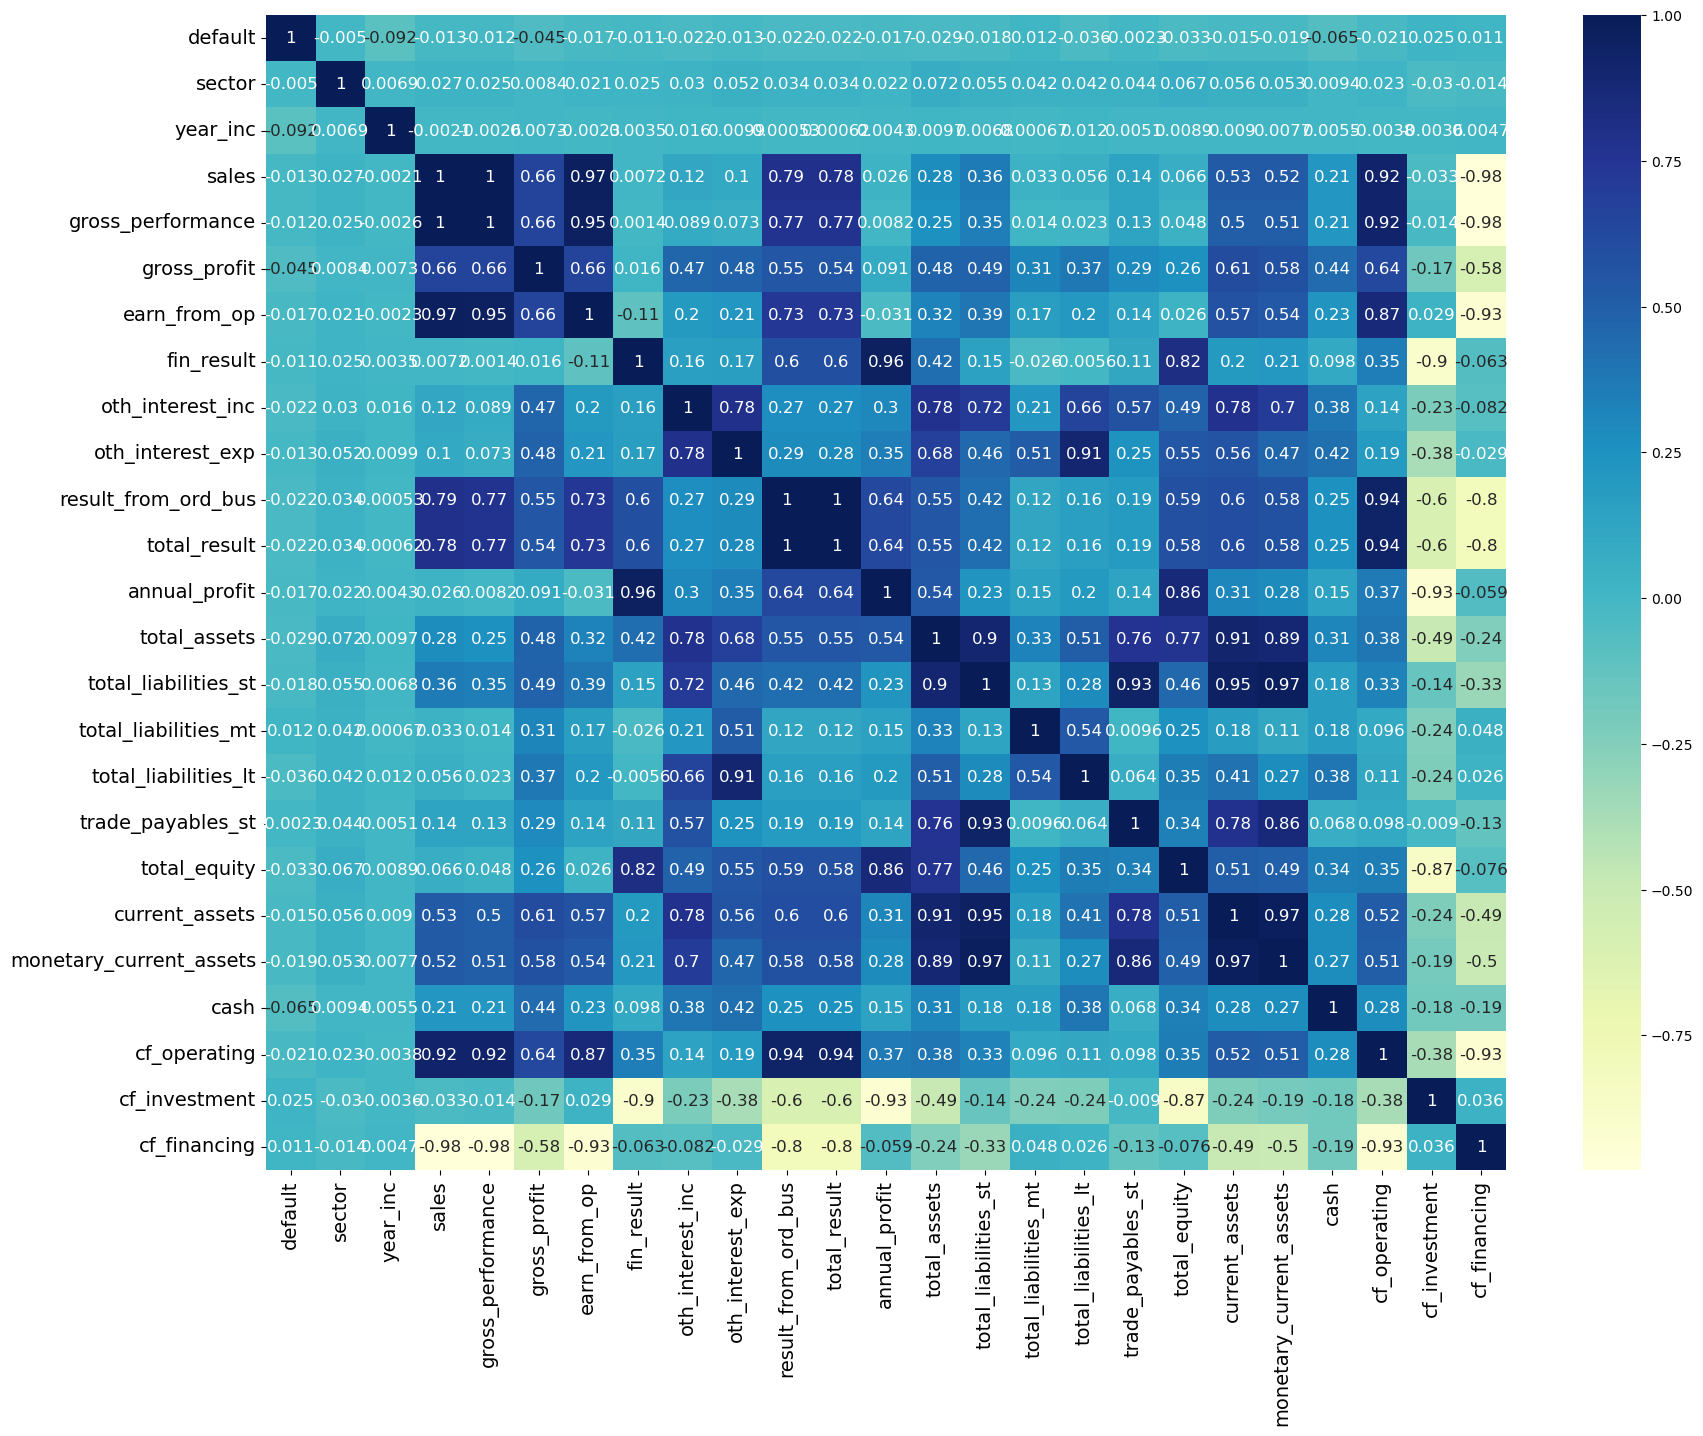

In [22]:
# Using HeatMap to check multicollinearity
heatMap = sns.heatmap(correlation_matrix,annot = True, cmap = 'YlGnBu', annot_kws={'size':12})
heatMap=plt.gcf()
heatMap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [23]:
# Dropping multicolinear features
train_data.drop(columns=['total_assets','total_equity','sales','fin_result', 'total_result','annual_profit','gross_performance', 'earn_from_op', 'result_from_ord_bus', 'total_liabilities_st', 'total_liabilities_lt', 'trade_payables_st', 'current_assets', 'monetary_current_assets', 'cf_operating'], inplace=True)

In [24]:
# Redo the correlation matrix to see the effects of dropping other features
correllation_Matrix = train_data.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'default'),
  Text(0, 1.5, 'sector'),
  Text(0, 2.5, 'year_inc'),
  Text(0, 3.5, 'gross_profit'),
  Text(0, 4.5, 'oth_interest_inc'),
  Text(0, 5.5, 'oth_interest_exp'),
  Text(0, 6.5, 'total_liabilities_mt'),
  Text(0, 7.5, 'cash'),
  Text(0, 8.5, 'cf_investment'),
  Text(0, 9.5, 'cf_financing')])

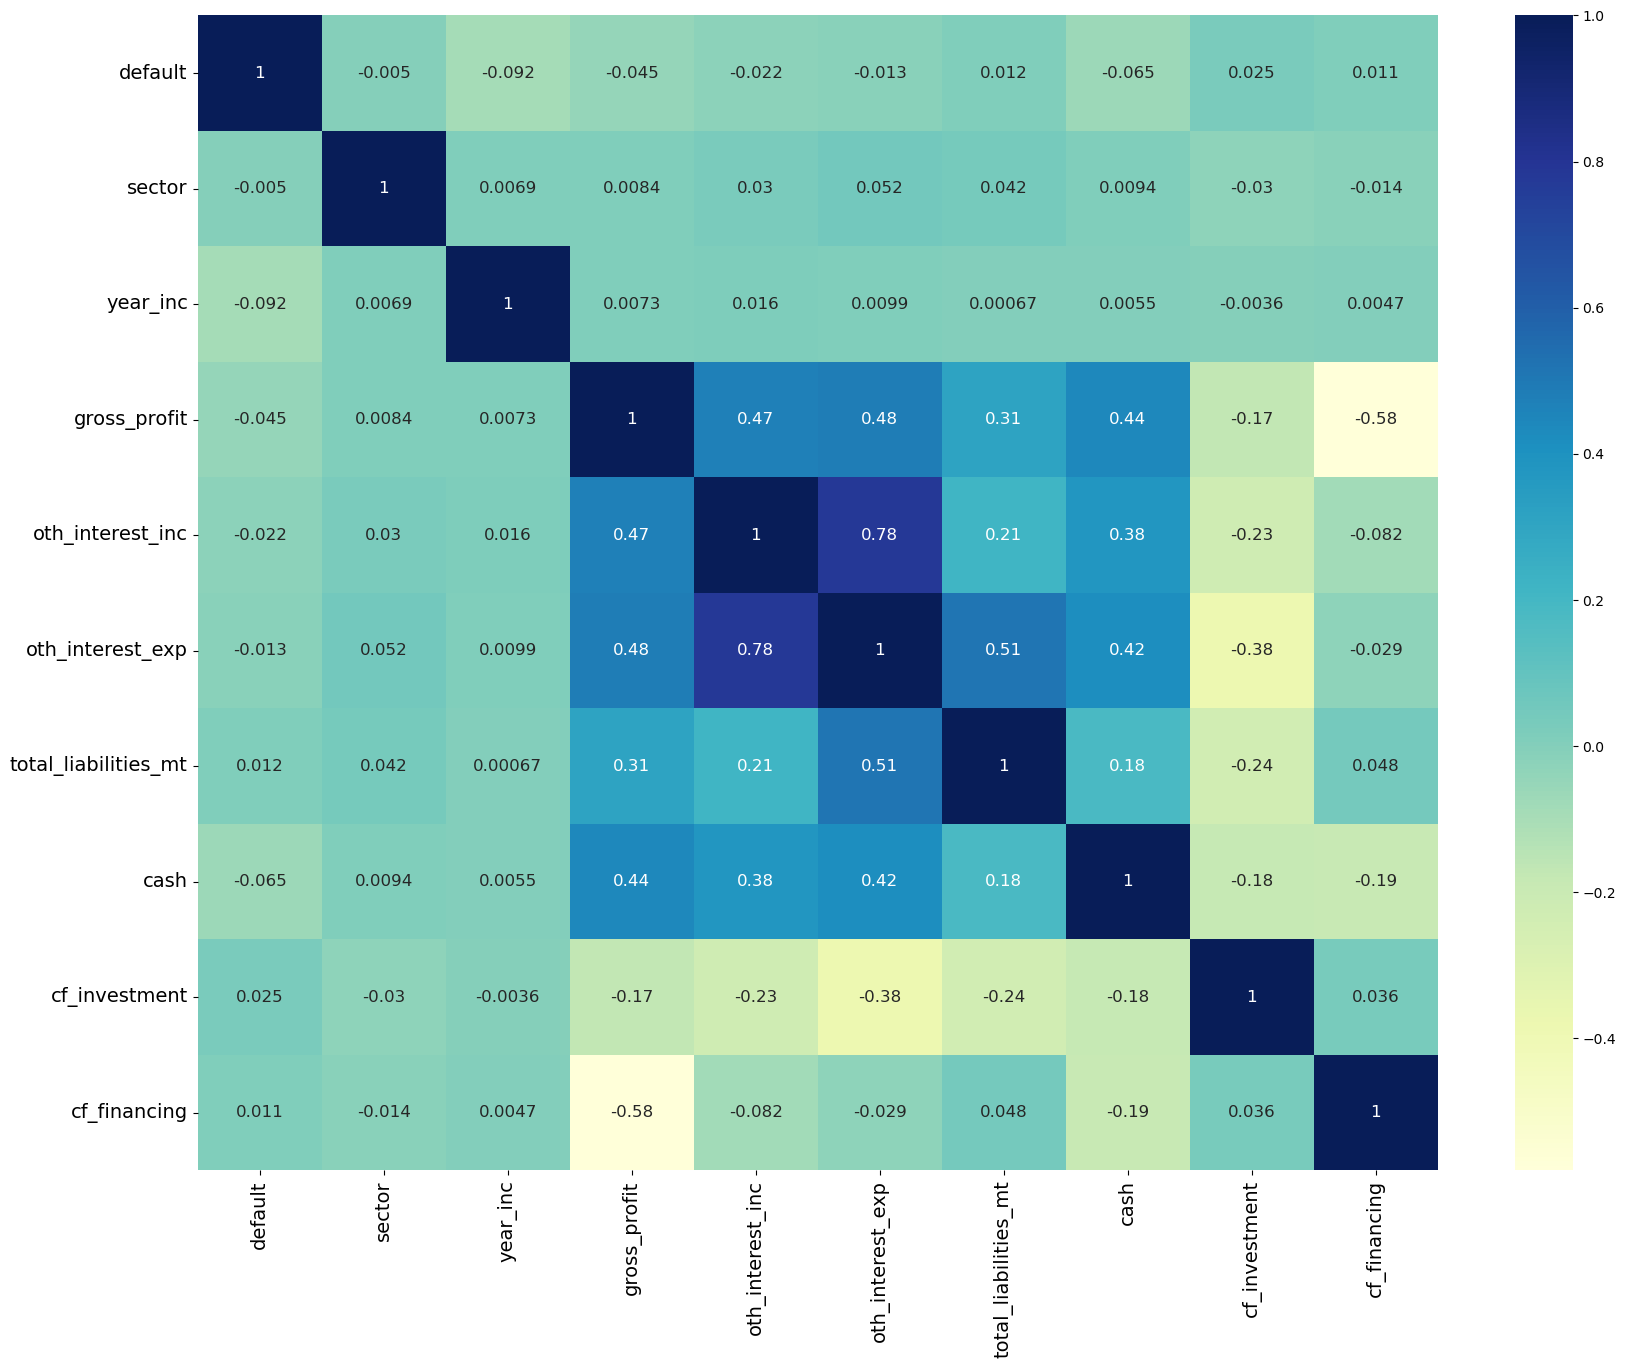

In [25]:
# Using HeatMap to confirm changes multicollinearity
heatMap = sns.heatmap(correllation_Matrix,annot = True, cmap = 'YlGnBu', annot_kws={'size':12})
heatMap=plt.gcf()
heatMap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [26]:
train_data.shape

(669, 11)

In [27]:
train_data.describe()

,default,sector,year_inc,gross_profit,oth_interest_inc,oth_interest_exp,total_liabilities_mt,cash,cf_investment,cf_financing
count,669.000000,669.000000,669.000000,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02
mean,0.062780,50519.246637,1981.545590,1.715178e+07,1.152394e+05,6.712869e+05,3.469473e+06,1.873788e+06,-3.298109e+06,-2.718206e+06
std,0.242749,21434.495416,113.462146,6.859464e+07,8.268201e+05,3.517392e+06,1.761420e+07,6.766454e+06,3.199125e+07,6.975793e+07
min,0.000000,1110.000000,0.000000,-8.197000e+06,4.000000e-02,2.700000e-01,0.000000e+00,3.090000e+00,-7.339750e+08,-1.775700e+09
25%,0.000000,36001.000000,1985.000000,6.183332e+05,6.661900e+02,9.330550e+03,0.000000e+00,2.210177e+04,-5.332571e+05,-3.057775e+05
50%,0.000000,46730.000000,1996.000000,1.900149e+06,3.079425e+03,3.566518e+04,1.112301e+04,1.353199e+05,-6.214998e+04,-1.066428e+04
75%,0.000000,68300.000000,2003.000000,1.048911e+07,1.395705e+04,2.038454e+05,4.493152e+05,8.242037e+05,-3.944000e+03,2.783100e+04
max,1.000000,96090.000000,2011.000000,1.108200e+09,1.168552e+07,6.048314e+07,2.816704e+08,8.446800e+07,1.378791e+08,1.239602e+08


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    669 non-null    object 
 1   default               669 non-null    int64  
 2   sector                669 non-null    int64  
 3   year_inc              669 non-null    int64  
 4   gross_profit          669 non-null    float64
 5   oth_interest_inc      669 non-null    float64
 6   oth_interest_exp      669 non-null    float64
 7   total_liabilities_mt  669 non-null    float64
 8   cash                  669 non-null    float64
 9   cf_investment         669 non-null    float64
 10  cf_financing          669 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 57.6+ KB


In [29]:
#function to calculate weight of evidence and information value

def iv_woe(train_data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = train_data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (train_data[ivars].dtype.kind in 'bifc') and (len(np.unique(train_data[ivars]))>10):
            binned_x = pd.qcut(train_data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': train_data[target]})
        else:
            d0 = pd.DataFrame({'x': train_data[ivars], 'y': train_data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(train_data, target='default', bins=20)

Information value of id is 16.276721
Information value of sector is 0.35559
Information value of year_inc is 0.432104
Information value of gross_profit is 0.445289
Information value of oth_interest_inc is 0.626288
Information value of oth_interest_exp is 0.410768
Information value of total_liabilities_mt is 0.247372
Information value of cash is 0.650226
Information value of cf_investment is 0.550275
Information value of cf_financing is 0.722284


In [30]:
print(iv)

               Variable         IV
0                    id  16.276721
0                sector   0.355590
0              year_inc   0.432104
0          gross_profit   0.445289
0      oth_interest_inc   0.626288
0      oth_interest_exp   0.410768
0  total_liabilities_mt   0.247372
0                  cash   0.650226
0         cf_investment   0.550275
0          cf_financing   0.722284


In [31]:
train_data.tail(10)

,id,default,sector,year_inc,gross_profit,oth_interest_inc,oth_interest_exp,total_liabilities_mt,cash,cf_investment,cf_financing
659,C_507,0,66290,2008,1934459.47,2127.080,35665.185,0.00,263369.080,-85537.46,-6.980000e-10
660,C_176,0,46495,1997,5232886.88,341.680,22205.980,240000.00,677789.320,-243526.79,-5.370269e+05
661,C_478,0,10130,1999,19422567.69,4957.240,31109.520,4500000.00,2211065.630,-1586523.83,-8.896463e+05
662,C_385,1,86100,1997,333040.50,3079.425,156151.080,1010753.90,135319.915,-15268.74,-4.754630e+05
663,C_997,0,46510,1996,1432719.05,3941.120,10663.040,0.00,252829.970,-27156.74,-1.996432e+05
664,C_105,0,70210,2000,2312606.11,153.150,4292.600,0.00,252537.310,-42703.50,7.796825e+04
665,C_378,0,46693,2000,43070207.79,499.370,7979883.630,0.00,573037.660,-494000.00,-1.400459e+06
666,C_240,0,68100,2000,1388887.09,64943.190,1113110.050,27894152.13,903999.860,-51045.00,-1.562539e+05
667,C_045,0,79110,2011,14957117.83,32421.120,201428.960,6833800.00,3653350.010,-789309.21,-5.443000e+05
668,C_155,0,52291,1980,5700095.76,10894.040,57231.800,0.00,2604320.000,-18344.90,-9.737066e+05


In [32]:
#checking  to see if class labels are balanced
#X= train_data.drop(columns=['default', 'id'], axis=1,inplace=True)
#y = train_data['default']
train_data=train_data.set_index('id')

In [33]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns='default',axis=1), train_data['default'])

In [34]:
#importing libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [35]:
#dealing with imbalance data
os = RandomOverSampler()
X_train, y_train = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train)

In [36]:
#building model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
X_test.isnull().sum()

sector                  0
year_inc                0
gross_profit            0
oth_interest_inc        0
oth_interest_exp        0
total_liabilities_mt    0
cash                    0
cf_investment           0
cf_financing            0
dtype: int64

In [38]:
#predicting
y_preds = model.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [39]:
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.41      0.58       159
           1       0.08      0.89      0.14         9

    accuracy                           0.43       168
   macro avg       0.53      0.65      0.36       168
weighted avg       0.94      0.43      0.55       168



In [40]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
id,,,
C_199,0,0.672207,1
C_155,0,0.060549,0
C_350,0,0.463692,0
C_240,0,0.601195,1
C_944,0,0.583404,1


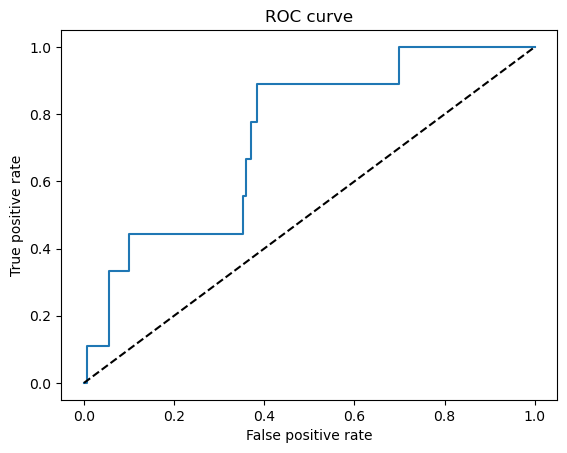

In [41]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [42]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.7351502445842069

In [43]:
# Gini Coefficient
Gini = AUROC * 2 - 1
Gini

0.4703004891684137

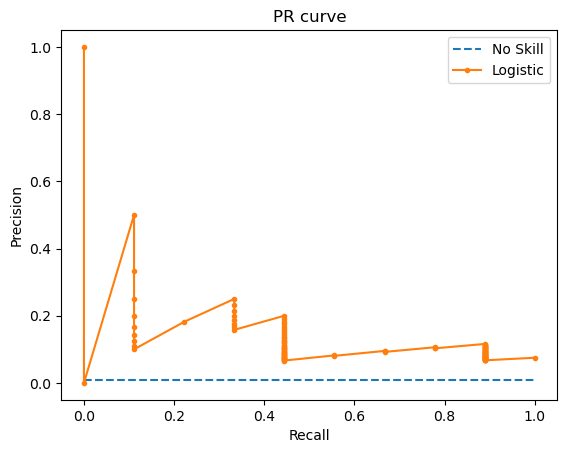

In [44]:
from sklearn.metrics import precision_recall_curve, auc
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y_train)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# -calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [45]:
#-precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.13641814618716686

In [46]:
# -calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
id,,,
C_006,0,1.817516e-12,0
C_299,0,8.478095e-11,0
C_261,0,3.566283e-09,0
C_449,0,1.696663e-07,0
C_404,0,8.482745e-06,0


In [47]:
actual_predicted_probs_df.tail()

,y_test_class_actual,y_hat_test_proba,y_hat_test
id,,,
C_972,0,0.745138,1
C_884,0,0.765389,1
C_888,0,0.768211,1
C_855,1,0.993361,1
C_674,0,0.999994,1


In [48]:
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()

In [49]:
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()

In [50]:
actual_predicted_probs_df.head()

,id,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad
0,C_006,0,1.817516e-12,0,1,0,1
1,C_299,0,8.478095e-11,0,2,0,2
2,C_261,0,3.566283e-09,0,3,0,3
3,C_449,0,1.696663e-07,0,4,0,4
4,C_404,0,8.482745e-06,0,5,0,5


In [51]:
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
actual_predicted_probs_df.head()

,id,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad,cum_n_%,cum_good_%,cum_bad_%
0,C_006,0,1.817516e-12,0,1,0,1,0.005952,0.0,0.006289
1,C_299,0,8.478095e-11,0,2,0,2,0.011905,0.0,0.012579
2,C_261,0,3.566283e-09,0,3,0,3,0.017857,0.0,0.018868
3,C_449,0,1.696663e-07,0,4,0,4,0.023810,0.0,0.025157
4,C_404,0,8.482745e-06,0,5,0,5,0.029762,0.0,0.031447


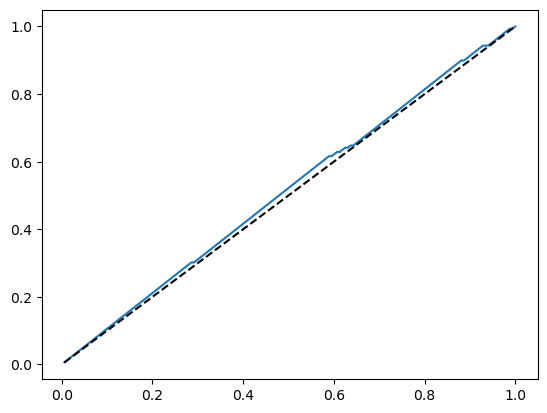

In [52]:
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

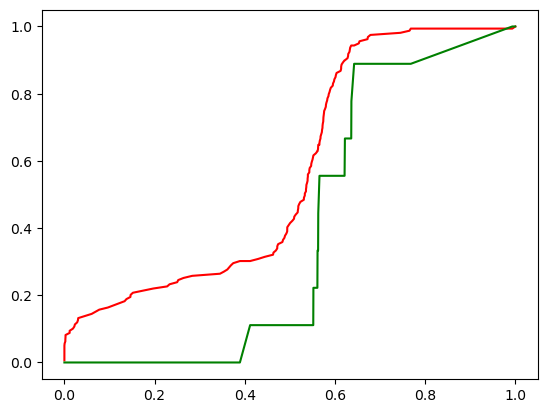

In [53]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [54]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.5052410901467506


# This model is quite good based on the KS Score value at 53%, however it can serve the purpose of this project.

In [55]:
actual_predicted_probs_df.to_csv('PDs.csv', index=False)